# Laboratorio
## Logistic Regression
Roberto Figueroa - 18306

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [236]:
df = pd.read_csv('insurance.csv')

## Exploración de datos

In [227]:
df.head() #veremos cuáles son los valores y columnas que maneja nuestro dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [228]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950
347,46,1,33.345,1,0,0,8334.45755


In [229]:
df.info() #exploraremos los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


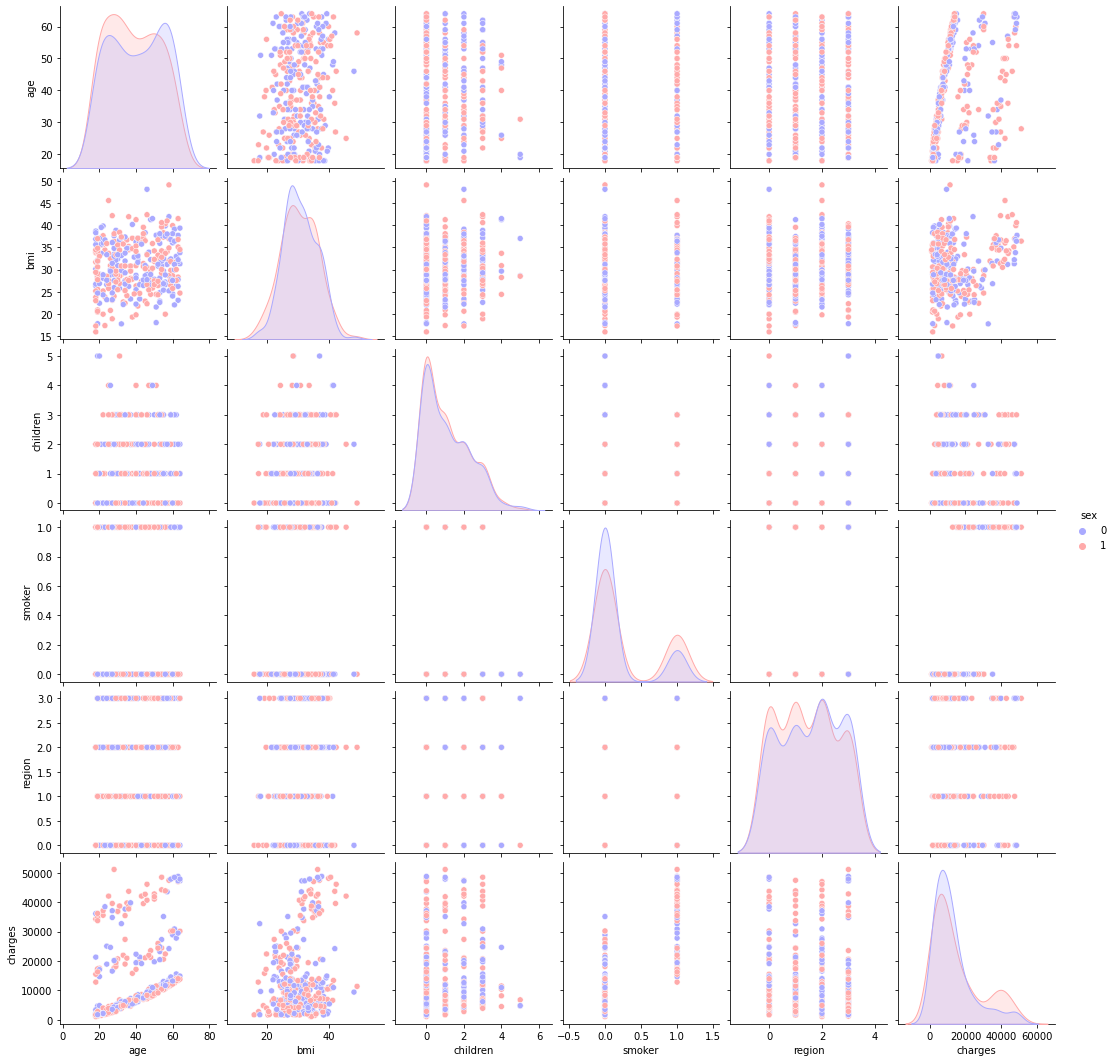

In [230]:
#apreciacion de la distribución de los datos
sns.pairplot(data=df, hue='sex', palette='bwr')

Exploración de edad

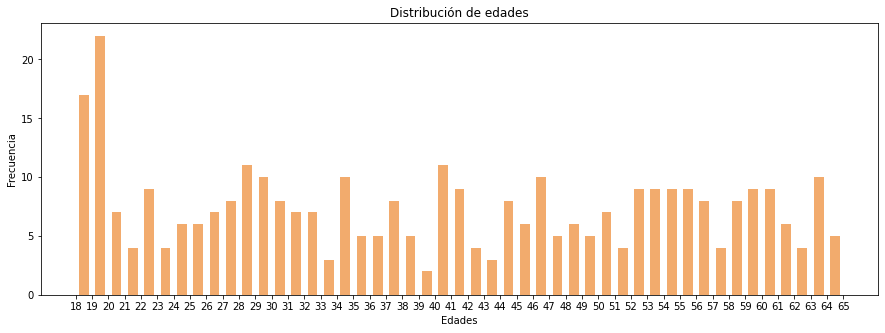

In [170]:
intervalos = range(min(df['age']), max(df['age']) + 2) 
fig = plt.figure(figsize=(15,5))
plt.hist(x=df['age'], bins=intervalos, color='#F2AB6D', rwidth=0.60)
plt.title('Distribución de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

Exploración edad vs cargos mensuales

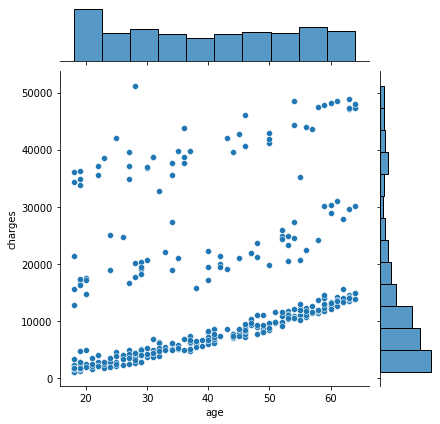

In [171]:
sns.jointplot(data=df,x='age',y='charges')

Exploracion relacion hijos con cargos

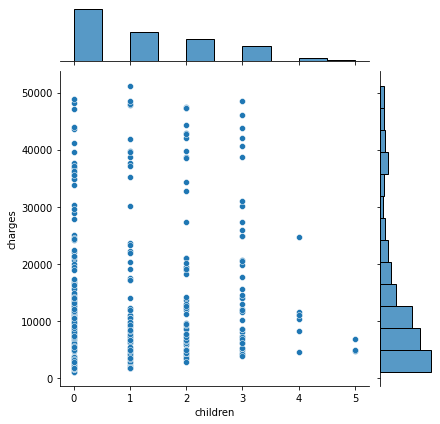

In [172]:
sns.jointplot(data=df,x='children',y='charges')

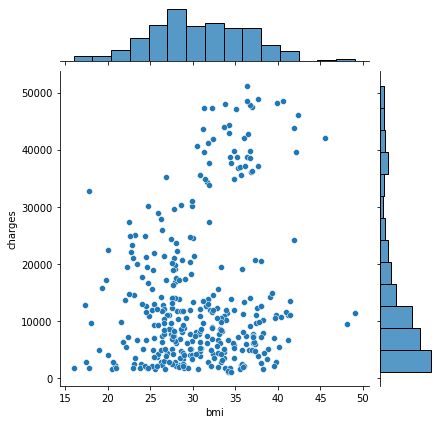

In [173]:
sns.jointplot(data=df,x='bmi',y='charges')

## Preparación de los datos

Conteo de valores null en cada campo

In [237]:
columns = list(df.columns.values)
null_values = {}
for i in columns:
    null_values[i] = df[i].isna().sum() + df[i].isnull().sum()
print(null_values)

{'age': 0, 'sex': 0, 'bmi': 0, 'children': 0, 'smoker': 0, 'region': 0, 'charges': 0}


## Preparación de los datos - datos categóricos

Dado a que los datos provenientes ya están codificados, se procede a saltar este paso, solo se le aplicará hot enbeding en la columna de region

In [238]:
pd.get_dummies(df, columns=["region"]).head() #impresión de las nuevas columnas aplicando hot encoding

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [239]:
df=pd.get_dummies(df, columns=["region"]) #asignacion del nuevo dataframe

In [240]:
df.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   charges   348 non-null    float64
 6   region_0  348 non-null    uint8  
 7   region_1  348 non-null    uint8  
 8   region_2  348 non-null    uint8  
 9   region_3  348 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 17.8 KB


## División en training y test set

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
ad_data = df
X = ad_data[['age', 'sex', 'bmi','children', 'smoker', 'region_0', 'region_1', 'region_2', 'region_3']] #features (feature matrix)
y = ad_data['charges'] #response (response vector)

In [181]:
#exploring X (features matrix)
print(X[:5])

   age  sex     bmi  children  smoker  region_0  region_1  region_2  region_3
0   19    0  27.900         0       1         0         0         0         1
1   18    1  33.770         1       0         0         0         1         0
2   28    1  33.000         3       0         0         0         1         0
3   33    1  22.705         0       0         0         1         0         0
4   32    1  28.880         0       0         0         1         0         0


In [182]:
#exploring y (response vector)
print(y[:5])

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Preparación de los datos - escala

Cuando usamos normalización hacemos un rescale a un rango de [0, 1] y cuando aplicamos estandarización hacemos el rescale colocando la media en 0 y una desviación estándar de 1. Cualquiera de los dos se encuentran en las librerías normalmente y sepueden encontrar como MinMaxScaler y StandardScaler respectivamente. Para este ejercicio vamos a utilizar el segundo.

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X_train)
print(scaled)

[[ 1.33960806 -0.99571733 -0.75642383 ... -0.52935789 -0.60875959
  -0.58230616]
 [ 0.78173732 -0.99571733 -1.63899616 ... -0.52935789  1.6426846
  -0.58230616]
 [-0.33400415  1.0043011  -0.53600384 ... -0.52935789 -0.60875959
  -0.58230616]
 ...
 [ 1.26987422  1.0043011   3.26914121 ... -0.52935789  1.6426846
  -0.58230616]
 [ 1.47907575 -0.99571733  0.07438997 ...  1.88908111 -0.60875959
  -0.58230616]
 [ 0.92120501 -0.99571733 -1.06162073 ...  1.88908111 -0.60875959
  -0.58230616]]


In [247]:
scaled[0]

array([ 1.33960806, -0.99571733, -0.75642383, -0.96889834, -0.53599703,
        1.69803808, -0.52935789, -0.60875959, -0.58230616])

## Modelación Lineal

1. Implementación from scratch de least squares

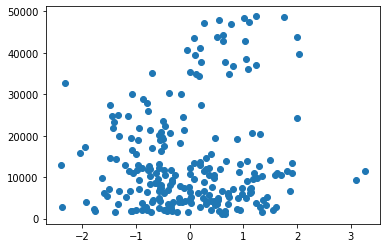

In [248]:
X_coords = scaled[:,2]
Y_coords = y_train
plt.scatter(X_coords, Y_coords)
plt.show()

In [249]:
#Building the model
X_mean = np.mean(X_coords)
Y_mean = np.mean(Y_coords)

num = 0
den = 0

for i in zip(X_coords, Y_coords):
    num += (i[0] - X_mean)*(i[1] - Y_mean)
    den += (i[0] - X_mean)**2
    
m = num / den
c = Y_mean - m * X_mean

print(m,c)

1464.7693026826225 13949.40351939914


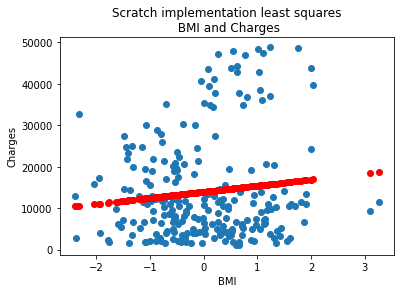

In [250]:
#Making predictions
Y_pred = m*X_coords +c
plt.scatter(X_coords, Y_coords)
plt.scatter(X_coords, Y_pred, color='red') #predicted
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scratch implementation least squares\n BMI and Charges')
plt.show()

2. Utilizando librería

In [251]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_features=scaled[:,2].reshape(-1,1)
train = y_train.to_numpy()
regr.fit(x_features, train)

LinearRegression()

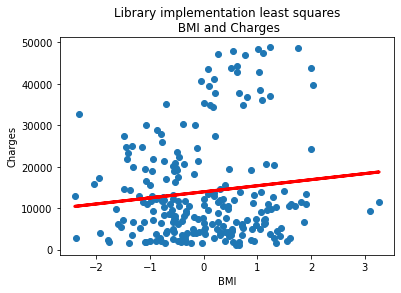

In [252]:
#plotting
plt.scatter(X_coords, Y_coords)
plt.plot(X_coords, regr.predict(X_coords.reshape(-1,1)), color='red', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Library implementation least squares\n BMI and Charges')
plt.show()

3. Utilizando librería con más features

In [253]:
reg = linear_model.LinearRegression()
x_features=scaled[:,[1,3]].reshape(-1,2)
train = y_train.to_numpy()
reg.fit(x_features, train)

LinearRegression()

## Evaluación de los modelos

In [254]:
from sklearn.metrics import mean_absolute_error

In [266]:
#For the first regression
scaled = scaler.fit_transform(X_test)
y_pred = regr.predict(scaled[:,2].reshape(-1,1))
error = mean_absolute_error(y_test.to_numpy(), y_pred)

In [267]:
error

9989.04596152629